# Wetterstation Kloten

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import interp1d

1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

In [2]:
#load csv file
weather = np.loadtxt('Zürich21-22-GruppeG.csv', skiprows=1, delimiter=';', dtype=str)

#select data for Kloten
klo_weather = [row for row in weather if row[0] == 'KLO'] #klo_weather is a list of lists or Numpy array???


- #stn: Stationnummer oder ID der Wetterstation
- time: Zeitpunkt der Messung im Format JJJJMMDDhhmm
- prestah0: Luftdruck auf Stationshöhe (in hPa)
- tre200h0: Lufttemperatur in 2m Höhe (in Grad Celsius)
- rre150h0: Niederschlagssumme (in mm) der letzten 6 Minuten
- su2000h0: Sonnenscheindauer in Minuten der letzten Stunde
- time_diff: Zeitdifferenz zur vorigen Messung in Minuten

In [3]:
print("Anzahl Messungen:", len(klo_weather))


klo_weather_t = np.transpose(klo_weather)

#stn;time;prestah0;tre200h0;rre150h0;su2000h0;time_diff
#stn = klo_weather_t[0]
#time = klo_weather_t[1].astype.datetime
time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in klo_weather_t[1]]
prestah0 = klo_weather_t[2].astype(float)
tre200h0 = klo_weather_t[3].astype(float)
rre150h0 = klo_weather_t[4].astype(float)
su2000h0 = klo_weather_t[5].astype(float)
time_diff = klo_weather_t[6].astype(float)

Anzahl Messungen: 7473


2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

In [5]:
#daten für demo
time_diff_demo = time_diff[:25]
max_demo = int(np.max(time_diff_demo))
t_demo = np.linspace(0, max_demo, (2*max_demo))

max = int(np.max(time_diff))
t = np.linspace(0, max, (2*max))

f_cubic     = interp1d(time_diff, klo_weather_t[2:6], kind='cubic')
f_linear    = interp1d(time_diff, klo_weather_t[2:6], kind = 'linear')
f_quadratic = interp1d(time_diff, klo_weather_t[2:3], kind='quadratic')
f_nearest   = interp1d(time_diff, klo_weather_t[2:3], kind='nearest')

prestah0_inter_cubic, tre200h0_inter_cubic,rre150h0_inter_cubic, su2000h0_inter_cubic       = f_cubic(t)
prestah0_inter_linear, tre200h0_inter_linear,rre150h0_inter_linear, su2000h0_inter_linear   = f_linear(t)

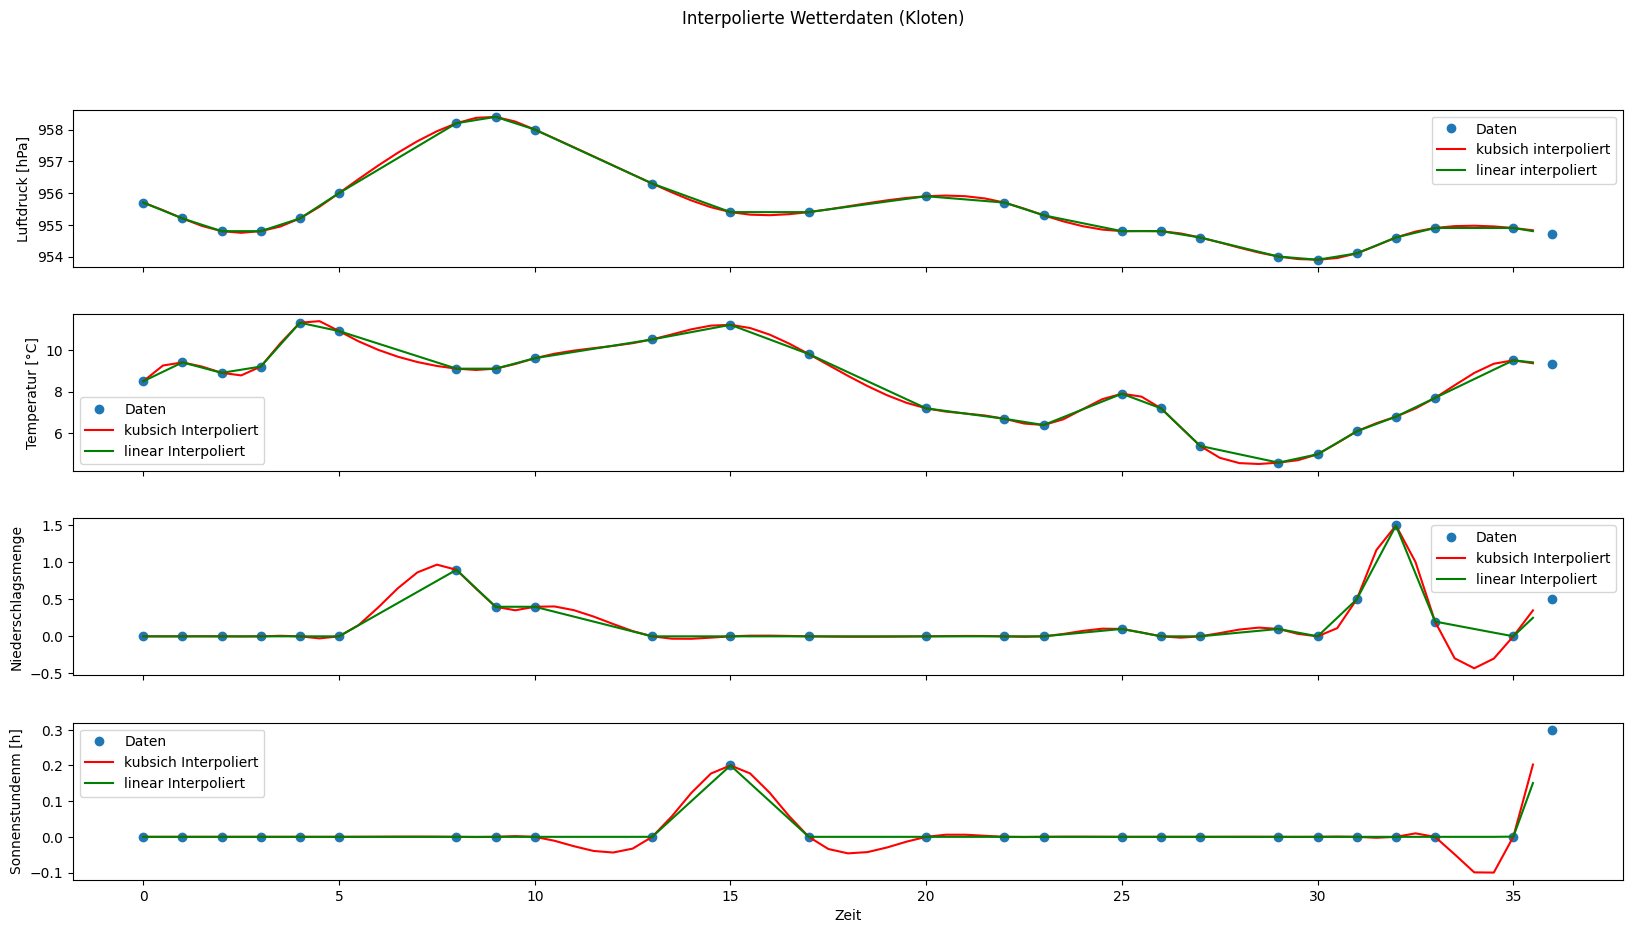

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(time_diff_demo, prestah0[:25], 'o', label='Daten')
#ax1.plot(t_demo[0:2*max_demo], pressure_inter_quadratic[0:2*max_demo], 'yellow', label='quadratisch interpoliert')
ax1.plot(t[0:2*max_demo], prestah0_inter_cubic[0:2*max_demo], 'r-', label='kubsich interpoliert')
ax1.plot(t[0:2*max_demo], prestah0_inter_linear[0:2*max_demo], 'g-', label='linear interpoliert')
#ax1.plot(t_demo[0:2*max_demo], pressure_inter_nearest[0:2*max_demo], 'yellow', label='nearest',linewidth=2)

ax1.set_ylabel('Luftdruck [hPa]')
#ax1.set_xlabel('Zeit')
ax1.legend()

ax2.plot(time_diff_demo, tre200h0[:25], 'o', label='Daten')
ax2.plot(t[0:2*max_demo], tre200h0_inter_cubic[0:2*max_demo], 'r-', label='kubsich Interpoliert')
ax2.plot(t[0:2*max_demo], tre200h0_inter_linear[0:2*max_demo], 'g-', label='linear Interpoliert')
ax2.set_ylabel('Temperatur [°C]')
#ax2.set_xlabel('Zeit')
ax2.legend()

ax3.plot(time_diff_demo, rre150h0[:25], 'o', label='Daten')
ax3.plot(t[0:2*max_demo], rre150h0_inter_cubic[0:2*max_demo], 'r-', label='kubsich Interpoliert')
ax3.plot(t[0:2*max_demo], rre150h0_inter_linear[0:2*max_demo], 'g-', label='linear Interpoliert')
ax3.set_ylabel('Niederschlagsmenge') #Einheit: mm ?
#ax3.set_xlabel('Zeit')
ax3.legend()

ax4.plot(time_diff_demo, su2000h0[:25], 'o', label='Daten')
ax4.plot(t[0:2*max_demo], su2000h0_inter_cubic[0:2*max_demo], 'r-', label='kubsich Interpoliert')
ax4.plot(t[0:2*max_demo], su2000h0_inter_linear[0:2*max_demo], 'g-', label='linear Interpoliert')
ax4.set_ylabel('Sonnenstundenm [h]')
#ax4.set_xlabel('Zeit')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolierte Wetterdaten (Kloten)')
plt.show()

3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

In [12]:
#Variablen instanzieren
daily_pressure = np.array([]).astype(float)
daily_average_pressure = 0

daily_temp = np.array([]).astype(float)
daily_average_temp = 0

daily_rain = np.array([]).astype(float)
daily_average_rain = 0

daily_sun = np.array([]).astype(float)
daily_average_sun = 0


for i in range(len(t)):
    daily_average_pressure += prestah0_inter_cubic[i]
    daily_average_temp += tre200h0_inter_cubic[i]
    daily_average_rain += rre150h0_inter_linear[i]
    daily_average_sun += su2000h0_inter_linear[i]
    if (i+1) % 48 == 0:
        daily_pressure = np.append(daily_pressure, daily_average_pressure/48)
        daily_average_pressure = 0
        daily_temp = np.append(daily_temp, daily_average_temp/48)
        daily_average_temp = 0
        daily_rain = np.append(daily_rain, daily_average_rain/48)
        daily_average_rain = 0
        daily_sun = np.append(daily_sun, daily_average_sun/48)
        daily_average_sun = 0

#für den letzten Tag wird der Durchschnitt nicht gerechnet, da die letzte stunde fehlt..
#soll die letzte stunde auch noch interpoliert werden oder soll der letzte tag trotzdem gerechnet werden????????????
#if daily_average != 0:
    
print(len(daily_pressure))
print(np.mean(daily_pressure))
print(np.mean(prestah0_inter_cubic))
print(np.max(daily_pressure))

print(len(daily_temp))
print(np.mean(daily_temp))
print(np.mean(tre200h0_inter_cubic))
print(np.max(daily_temp))

print(len(daily_rain))
print(np.mean(daily_rain))
print(np.mean(rre150h0_inter_linear))
print(np.max(daily_rain))

print(len(daily_sun))
print(np.mean(daily_sun))
print(np.mean(su2000h0_inter_linear))
print(np.max(daily_sun))


365
968.7483276283461
968.7549391193081
987.3920407234895
365
11.28179739373919
11.285233318017687
27.020911722714022
365
0.09574226584363142
0.09551431599725967
1.3790881487807403
365
0.23730384078965652
0.23676210924119467
0.6270476326027222


4. Für die folgenden Punkte sollt ihr eine der Variablen auswählen.
   - Entweder Luftdruck, Temperatur, Regenmenge oder Sonnenstunden

Luftdruck it is!

5. Vergleicht die ursprünglichen Daten mit den interpolierten Daten und zeigt eure Erkenntnisse auf. 
   - Hier könnt ihr euch z.B. fragen, wie sich unterschiedliche Interpolationsmethoden verhalten.

6. Berechnet Nullstellen bzw. Schnittpunkte mit einem Schwellenwert und überlegt euch, welche Aussagen ihr daraus ableiten könnt.
   - Ihr könntet z.B. sagen: "In Davos hatten wir im Winter X-mal weniger als Null Grad." oder "An welchen Tagen wurde die Regenmenge XY erreicht?".

7. Mithilfe der Ableitung soll nach grossen Änderungen in den Daten gesucht werden. 
   - So könnt ihr z.B. sagen: "Am Tag X hatten wir die grösste Änderungsrate des Luftdrucks".

8. Benutze die Integration, um gewisse Durchschnittswerte über einen definierten Zeitraum zu berechnen.
   - So könnt ihr z.B. die durchschnittlichen Sonnenstunden über den Sommer aufzeigen.